In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Layer():
  def __init__(self,inputSize,outputSize):
    self.W=np.random.rand(inputSize,outputSize)
    self.B=np.random.rand(1,outputSize)
    self.cum_deltaE_deltaW = 0
    self.cum_deltaE_deltaB = 0

  def forwardProp(self,X):
    self.X = X 
    self.Y = ((np.dot(X,self.W) + self.B)) 
    return self.Y


  def backProp(self,deltaE_deltaY,alpha):
    deltaY_deltaW = self.X
    deltaE_deltaW = np.dot(deltaY_deltaW.T,deltaE_deltaY)
    deltaE_deltaB = deltaE_deltaY
    deltaY_deltaX = self.W
    deltaE_deltaX  = np.dot(deltaE_deltaY,deltaY_deltaX.T)

    self.W = self.W - alpha * deltaE_deltaW
    self.B = self.B - alpha * deltaE_deltaB
    return deltaE_deltaX

In [0]:

class ActivationLayer():
  def __init__(self,activation,activationDerivative):
    self.activation = activation
    self.activationDerivative = activationDerivative

  def forwardProp(self,X):
    self.X = X
    self.Y = self.activation(X)
    return self.Y
    
  def backProp(self,deltaE_deltaY,alpha):
    return self.activationDerivative(self.X)*deltaE_deltaY


  

In [0]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

def derivativeSigmoid(X):
  return np.exp(-X)/(1+np.exp(-X)) 


def tanh(x):
  return np.tanh(x);

def tanh_prime(x):
  return 1-np.tanh(x)**2;

[0.8017681877026397, 0.7779837587146834, 0.7509065575450001, 0.7209167842214005, 0.6891693774320616, 0.6577862539168704, 0.6295925740550119, 0.6071733773722917, 0.5916900062415189, 0.5824551175208218, 0.5776431226295272, 0.575368315352466, 0.5742925890432192, 0.5736732390325556, 0.5731710802255212, 0.5726598347797187, 0.5721069509841873, 0.5715142052552296, 0.5708924522019807, 0.5702524969582051, 0.5696026142830345, 0.5689484441400028, 0.5682935470226699, 0.5676400104125887, 0.566988934460599, 0.5663407788652055, 0.5656955970374992, 0.565053189232686, 0.5644132007268272, 0.5637751838954126, 0.5631386370226614, 0.562503028287791, 0.5618678103845104, 0.5612324292583618, 0.5605963291715177, 0.5599589554897588, 0.559319756069315, 0.5586781817946993, 0.5580336866130868, 0.5573857272816534, 0.5567337629633492, 0.5560772547559243, 0.5554156652074526, 0.5547484578519252, 0.5540750967863515, 0.5533950463033234, 0.5527077705884798, 0.5520127334895952, 0.5513093983624519, 0.5505972279977764, 0.54

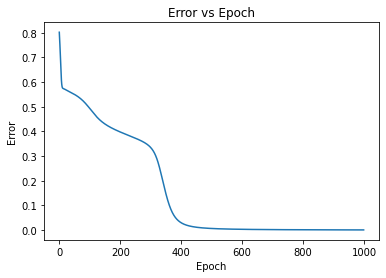

In [7]:
##XOR Gate

trainX = [[0,0],[0,1],[1,0],[1,1]]
trainX = np.asarray(trainX)

trainY = [1,0,0,1]
epoch = 1000
Threshold =0
alpha = 0.1

layer1 = Layer(2,2)
activationLayer1 = ActivationLayer(tanh,tanh_prime)
layer2 = Layer(2,1)
activationLayer2 = ActivationLayer(tanh,tanh_prime)

layerList = [layer1,activationLayer1,layer2,activationLayer2]
Error=[]

for i in range(0,epoch):
  E = 0
  for j in range(0,len(trainX)):
    Y = trainX[j].reshape((1,2))
    for layer in layerList:                                                          ##forward Prop
      Y = layer.forwardProp(Y) 
    E += 0.5*((trainY[j] - Y)**2 )
    
    deltaE_deltaY = -1*(trainY[j] - Y)
    
    for layer in layerList[::-1]:                                                    ##backward Prop
      deltaE_deltaY = layer.backProp(deltaE_deltaY,alpha)
      # print(deltaE_deltaY)
  # print(E)
  Error.append(E[0][0])
print(Error)
x=np.arange(epoch)
plt.title("Error vs Epoch")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(x,Error)





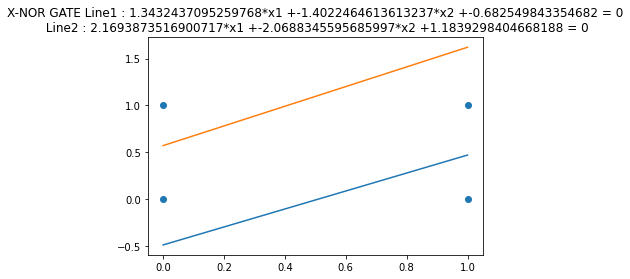

In [11]:

#Decision Boundary
# W1*x1 + W2*x2 + B1 = 0
# W3*x1 + W4*x2 + B2 = 0

W1 = layer1.W[0][0]
W2 = layer1.W[1][0]
W3 = layer1.W[0][1]
W4 = layer1.W[1][1]
B1 = layer1.B[0][0]
B2 = layer1.B[0][1]


p1 = (0,-B1/W2)
p2 = (-B1/W1,0)


m = (p1[1]-p2[1])/(p1[0]-p2[0])
c = p1[1] - m*p1[0]

x1 = np.arange(2)
y1 = m*x1 + c
plt.scatter([0,0,1,1],[0,1,0,1])
plt.plot(x1,y1)


p1 = (0,-B2/W4)
p2 = (-B2/W3,0)


m = (p1[1]-p2[1])/(p1[0]-p2[0])
c = p1[1] - m*p1[0]

x2 = np.arange(2)
y2 = m*x2 + c
# plt.scatter([0,0,1,1],[0,1,0,1])

plt.title('X-NOR GATE Line1 : '+str(W1)+'*x1 +'+str(W2)+'*x2 +'+str(B1)+' = 0'+ '\n Line2 : '+str(W3)+'*x1 +'+str(W4)+'*x2 +'+str(B2)+ ' = 0')
plt.plot(x2,y2)